In [1]:
ls -lh /content/sample_data

total 55M
-rwxr-xr-x 1 root root 1.7K Jan  1  2000 anscombe.json*
-rw-r--r-- 1 root root 295K Oct 23 13:26 california_housing_test.csv
-rw-r--r-- 1 root root 1.7M Oct 23 13:26 california_housing_train.csv
-rw-r--r-- 1 root root  18M Oct 23 13:26 mnist_test.csv
-rw-r--r-- 1 root root  35M Oct 23 13:26 mnist_train_small.csv
-rwxr-xr-x 1 root root  930 Jan  1  2000 README.md*


In [2]:
import pandas as pd

quartet = pd.read_json('/content/sample_data/anscombe.json')

In [3]:
quartet.sample(5)

,Series,X,Y
16,II,14,8.10
24,III,13,12.74
13,II,13,8.74
11,II,10,9.14
39,IV,8,5.25


<Axes: xlabel='X'>

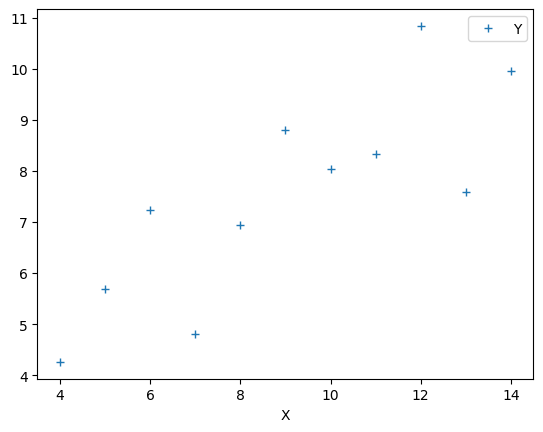

In [4]:
data = quartet[quartet.Series=='I'].set_index('X').sort_index()[['Y']]
data.plot(style='+')

Регре́ссия (лат. regressio — обратное движение, отход) в теории вероятностей и математической статистике — односторонняя стохастическая зависимость, устанавливающая соответствие между случайными переменными, то есть математическое выражение, отражающее связь между зависимой переменной у и независимыми переменными х при условии, что это выражение будет иметь статистическую значимость.

Если мы точно знаем как устроено распределение x и y - решением задачи занимается математика. А если у нас есть только выборка?

In [5]:
a = 5
def foo(x):
  return a * np.sqrt(x)

array([ 4.        ,  4.20408163,  4.40816327,  4.6122449 ,  4.81632653,
        5.02040816,  5.2244898 ,  5.42857143,  5.63265306,  5.83673469,
        6.04081633,  6.24489796,  6.44897959,  6.65306122,  6.85714286,
        7.06122449,  7.26530612,  7.46938776,  7.67346939,  7.87755102,
        8.08163265,  8.28571429,  8.48979592,  8.69387755,  8.89795918,
        9.10204082,  9.30612245,  9.51020408,  9.71428571,  9.91836735,
       10.12244898, 10.32653061, 10.53061224, 10.73469388, 10.93877551,
       11.14285714, 11.34693878, 11.55102041, 11.75510204, 11.95918367,
       12.16326531, 12.36734694, 12.57142857, 12.7755102 , 12.97959184,
       13.18367347, 13.3877551 , 13.59183673, 13.79591837, 14.        ])

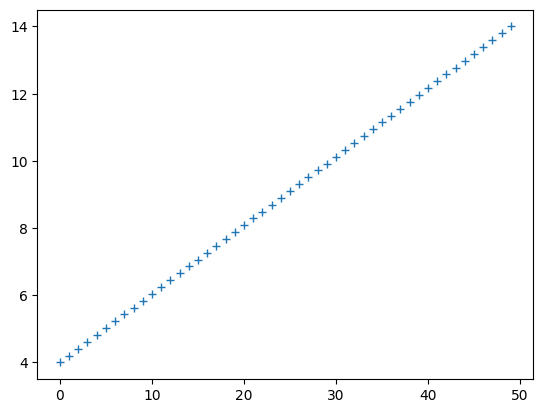

In [6]:
import numpy as np
import matplotlib.pyplot as plt

xx = np.linspace(4, 14)
plt.plot(xx, '+')
xx

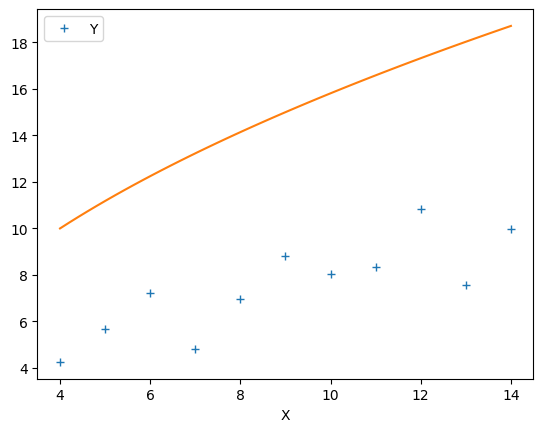

In [7]:
data.plot(style='+')
plt.plot(xx, foo(xx))
plt.show()

## Интерполяция
В каком-то смысле задача похожая - провести линию/поверхность через точки. Заполнить пространство между ними какими-то промежуточными значениями.

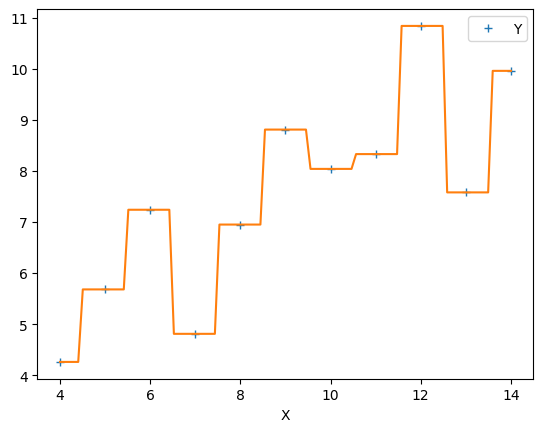

In [8]:
from scipy import interpolate
interp = interpolate.interp1d(data.index, data.Y, kind='nearest')

data.plot(style='+')
xx = np.linspace(data.index.min(), data.index.max(), 100)
plt.plot(xx, interp(xx))
plt.show()

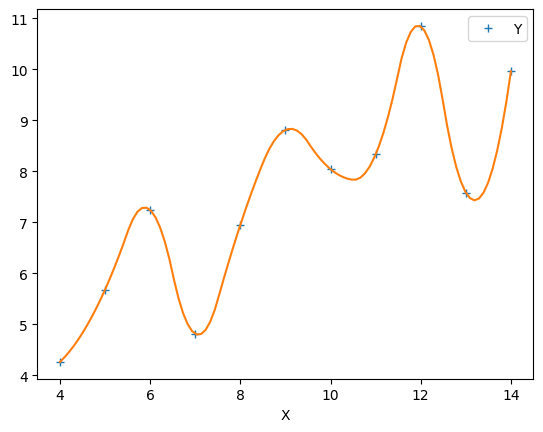

In [9]:
data.plot(style='+')
plt.plot(xx, interpolate.interp1d(data.index, data.Y, kind='quadratic')(xx))
plt.show()

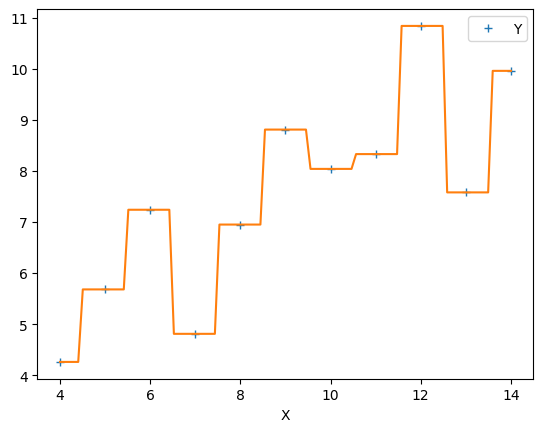

In [10]:
data.plot(style='+')
plt.plot(xx, interpolate.interp1d(data.index, data.Y, kind='nearest')(xx))
plt.show()

# Регрессии

## Линейная (метод наименьших квадратов)

Линейные методы предполагают, что между признаками объекта (features) и целевой переменной (target/label) существует линейная зависимость, то есть
$$y = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b, $$ где   
$у$ --- целевая переменная (что мы хотим предсказать),   
$x_i$ --- признак объекта $х$,   
$w_i$ --- вес $i$-го признака,   
$b$ --- bias (смещение, свободный член)  

  
**Функция потерь** --- это мера количества ошибок, которые наша линейная регрессия делает на наборе данных


$$
\begin{aligned}
L(y_{pred}, Y) &=  \frac{1}{n}\sum_{i=1}^{n}\left(y_{pred} - Y\right)^2
\end{aligned}
$$

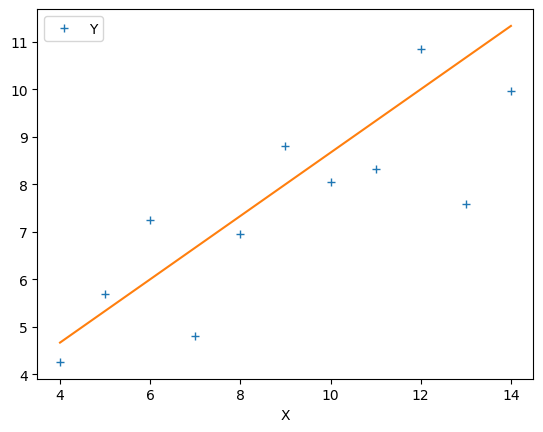

In [11]:
foo = lambda x: 2 * x/3 + 2
data.plot(style='+')
plt.plot(xx, foo(xx))
plt.show()

In [12]:
X = data.index.values.reshape(-1, 1)
xx = np.linspace(data.index.min(), data.index.max(), 100).reshape(-1, 1)
print(X.shape, xx.shape)

(11, 1) (100, 1)


[0.50027273] 2.9975454545454534


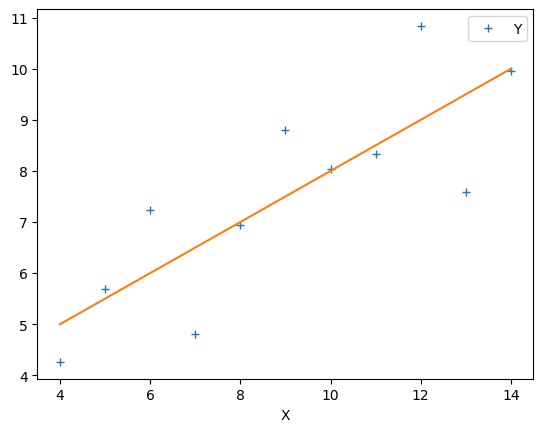

In [13]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X, data.Y)
print(linear.coef_, linear.intercept_)
a = linear.coef_[0]
b = linear.intercept_
data.plot(style='+')
plt.plot(xx, a * xx + b)
plt.show()

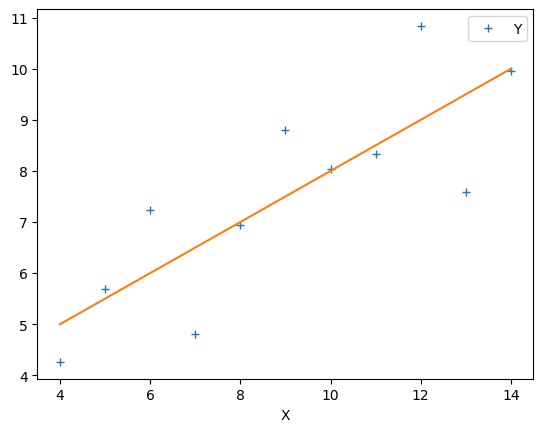

In [14]:
data.plot(style='+')
plt.plot(xx, linear.predict(xx))
plt.show()

## Полиномиальная

Вместо прямых линий подбираем параболы, гиперболы и т.д.

Конкретно в sklearn для этого применяют не отдельную модель, а препроцессор который добавляет степени x к набору входных параметров.

array([[  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.],
       [  1.,  11., 121.],
       [  1.,  12., 144.],
       [  1.,  13., 169.],
       [  1.,  14., 196.]])

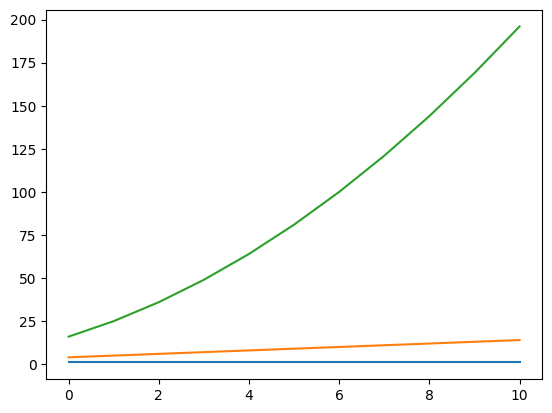

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x2 = poly.fit_transform(X)
plt.plot(x2)
x2

In [16]:
model2 = LinearRegression(fit_intercept=False).fit(x2, data.Y)
model2.coef_

array([ 0.75748718,  1.06817483, -0.03155012])

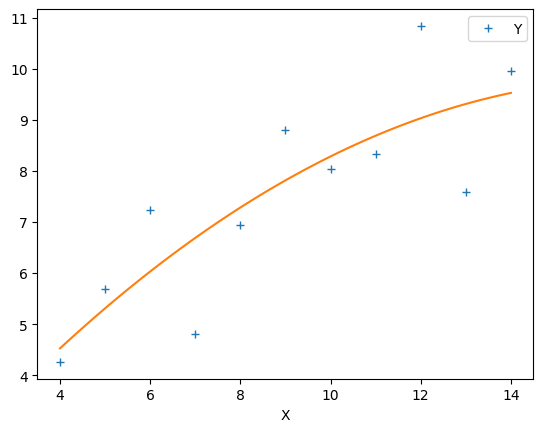

In [17]:
data.plot(style='+')
xx2 = poly.transform(xx.reshape(-1, 1))
plt.plot(xx, model2.predict(xx2))
plt.show()

В `Pipeline` хранятся все этапы рабочего процесса в виде единого объекта

array([ 2.07539173e+01,  3.47931679e+01,  3.47393201e+01, -1.57479804e+00,
       -4.00722348e+01,  2.82477527e+01, -9.26968547e+00,  1.78639873e+00,
       -2.17532179e-01,  1.69955649e-02, -8.28135328e-04,  2.29488089e-05,
       -2.76489310e-07])

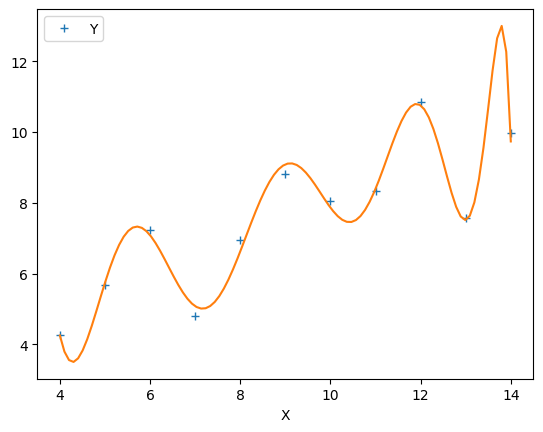

In [18]:
from sklearn.pipeline import Pipeline

model = Pipeline([('poly', PolynomialFeatures(degree=12)),
                  ('linear', LinearRegression(fit_intercept=False))])

model.fit(X, data.Y)
data.plot(style='+')
plt.plot(xx, model.predict(xx))
model['linear'].coef_

Видим возможное переобучение, но компьютер не умеет смотреть на графики. Как формализовать этот вопрос?

## Валидация

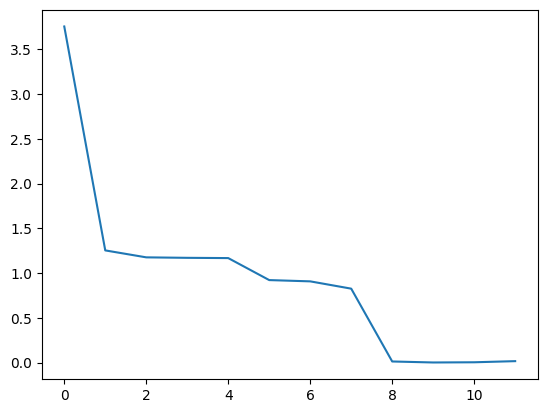

In [19]:
from sklearn.metrics import mean_squared_error
score=[]
X_ = data.index.values.reshape(-1, 1)
for n in range(12):
  model = Pipeline([('poly', PolynomialFeatures(degree=n)),
                    ('linear', LinearRegression(fit_intercept=False))])
  model.fit(X_, data['Y'])
  score.append(mean_squared_error(data['Y'], model.predict(X_)))
plt.plot(score)
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
Xtr, Xtest, Ytr, Ytest = train_test_split(data.index.values.reshape(-1, 1), data['Y'], random_state=11)
print([d.shape for d in (Xtr, Xtest, Ytr, Ytest)])

[(8, 1), (3, 1), (8,), (3,)]


In [21]:
train_score=[]
test_score=[]
for n in range(5):
  model = Pipeline([('poly', PolynomialFeatures(degree=n)),
                    ('linear', LinearRegression(fit_intercept=False))])
  model.fit(Xtr, Ytr)
  train_score.append(mean_squared_error(Ytr, model.predict(Xtr)))
  test_score.append(mean_squared_error(Ytest, model.predict(Xtest)))

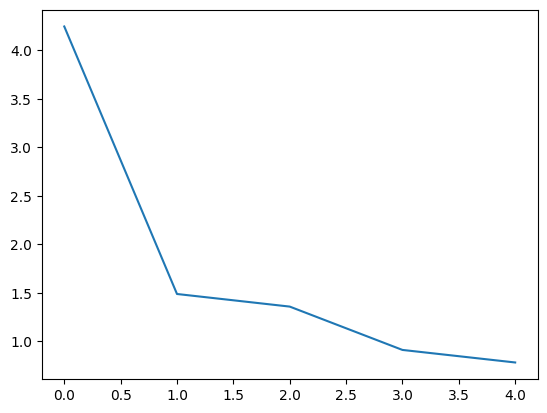

In [22]:
score = pd.DataFrame({'train': train_score, 'test': test_score})
score.train.plot()
plt.show()

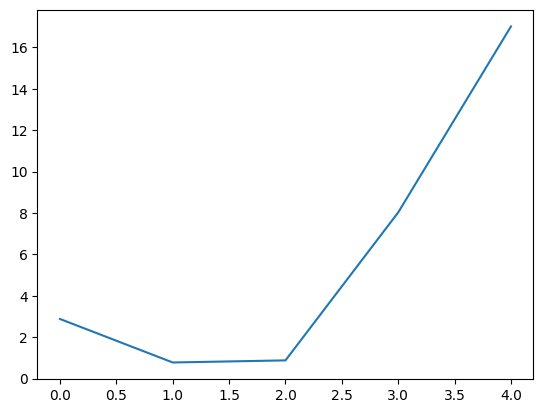

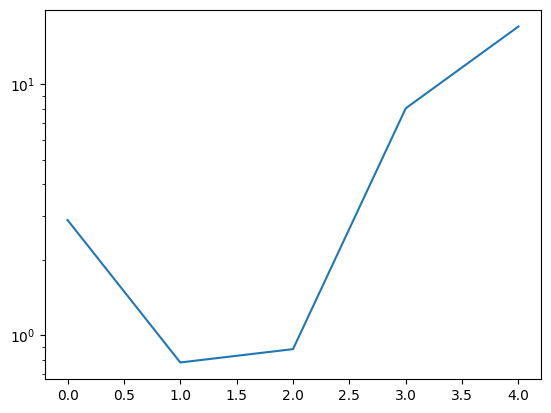

In [23]:
score.test.plot()
plt.show()

score.test.plot(logy=True)
plt.show()

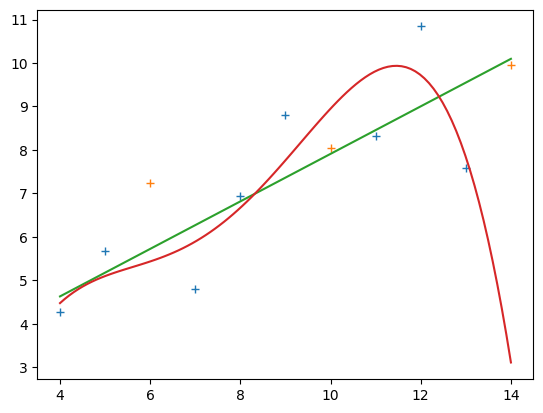

In [24]:
plt.plot(Xtr, Ytr, '+')
plt.plot(Xtest, Ytest, '+')
plt.plot(xx, Pipeline([('poly', PolynomialFeatures(degree=1)),
                  ('linear', LinearRegression(fit_intercept=False))]).fit(Xtr, Ytr).predict(xx))
plt.plot(xx, Pipeline([('poly', PolynomialFeatures(degree=4)),
                  ('linear', LinearRegression(fit_intercept=False))]).fit(Xtr, Ytr).predict(xx))
plt.show()

## Кроссвалидация

<img src='https://drive.google.com/uc?id=19TOWCsLwIjNSmcHzu46f6JqY5TEefm9h' width=600/>



In [25]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(32, test_size=2, random_state=13)
cv

ShuffleSplit(n_splits=32, random_state=13, test_size=2, train_size=None)

In [26]:
from sklearn.model_selection import cross_val_score
score = pd.DataFrame(columns=['mean', 'std'])
for n in range(14):
  model = Pipeline([('poly', PolynomialFeatures(degree=n)),
                    ('linear', LinearRegression(fit_intercept=False))])
  sc = cross_val_score(model, X, data.Y, cv=cv, scoring='neg_mean_squared_error')
  score.loc[n] = [-sc.mean(), sc.std()]
score

,mean,std
0,3.749158e+00,2.256893e+00
1,1.909871e+00,1.463886e+00
2,2.185026e+00,1.781001e+00
3,4.325427e+00,4.749990e+00
4,8.878841e+00,8.700607e+00
5,5.377961e+01,2.312146e+02
6,3.392532e+02,1.145795e+03
7,4.693229e+03,2.060563e+04
8,2.228197e+03,1.153361e+04
9,2.382550e+04,1.271965e+05


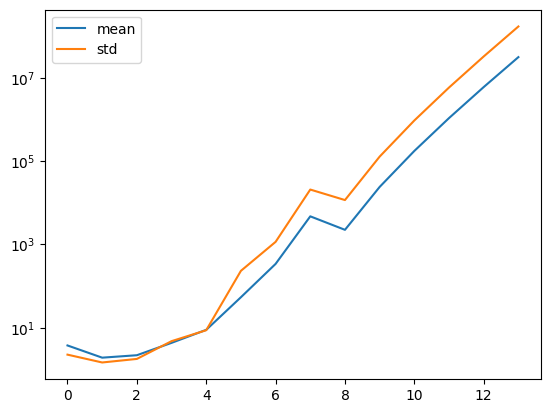

In [27]:
score.plot(logy=True)
plt.show()

1.9098709850443178

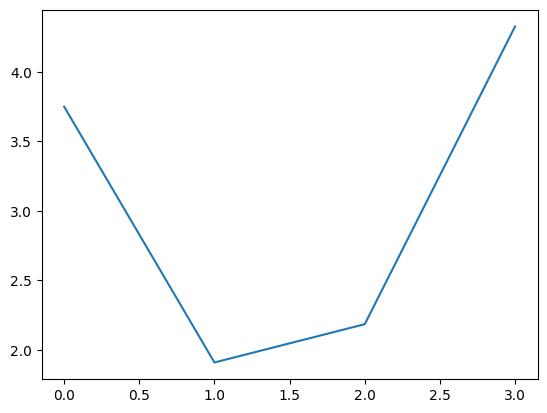

In [28]:
score[:4]['mean'].plot()
score['mean'].min()

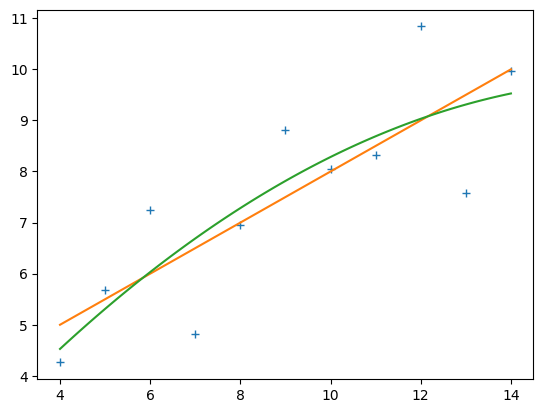

In [29]:
plt.plot(X, data.Y, '+')
plt.plot(xx, Pipeline([('poly', PolynomialFeatures(degree=1)),
                  ('linear', LinearRegression(fit_intercept=False))]).fit(X, data.Y).predict(xx))
plt.plot(xx, Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))]).fit(X, data.Y).predict(xx))

plt.show()

## Модели с регуляризацией

Борьба с переобучением со стороны уменьшения пространства поиска в окрестности небольших значений параметров модели.

Суть регуляризации состоит в том, чтобы добавлять к функции потерь слагаемое, ограничивающее рост весов модели.   
Например, обычная версия линейной регрессии выглядит так:
$$\frac{\sum\limits_{i=1}^{\ell}\left|\left|\langle x^i, w\rangle - y^i\right|\right|^2}{\ell} \rightarrow \min_{w}.$$

Регуляризованная версия:
$$\frac{\sum\limits_{i=1}^{\ell}\left|\left|\langle x^i, w\rangle - y^i\right|\right|^2}{\ell} + \lambda\left|\left|w\right|\right|_2^2\rightarrow \min_{w}.$$

Такая версия линейной регресси называется **Ridge**-регрессией.  


В **LASSO** мы штрафуем модель  **на сумму модулей всех ее весов** (на l1-норму весов), таким образом:

$$\frac{\sum\limits_{i=1}^{\ell}\left|\left|\langle x^i, w\rangle - y^i\right|\right|^2}{\ell} + \lambda\left|\left|w\right|\right|_1\rightarrow \min_{w}.$$

**ElasticNet** использует как L1, так и L2 регуляризации:

$$\frac{\sum\limits_{i=1}^{\ell}\left|\left|\langle x^i, w\rangle - y^i\right|\right|^2}{\ell}  + \lambda_2\left|\left|w\right|\right|_2^2 + \lambda_1\left|\left|w\right|\right|_1 \rightarrow \min_{w}.$$


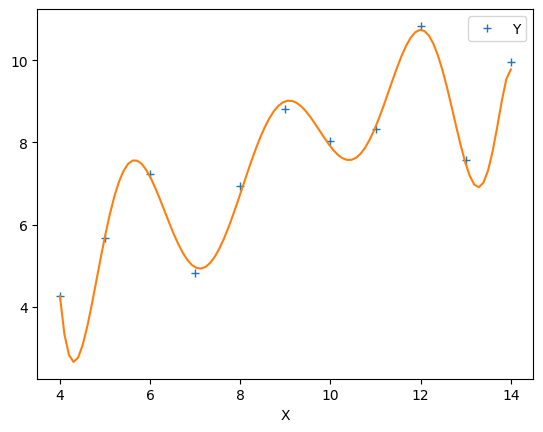

In [30]:
model_poly11 = Pipeline([('poly', PolynomialFeatures(degree=11)),
                         ('linear', LinearRegression(fit_intercept=False))])
model_poly11.fit(X, data.Y)
data.plot(style='+')
plt.plot(xx, model_poly11.predict(xx))
plt.show()

In [31]:
model_poly11['linear'].coef_

array([ 2.76990745e+02,  2.79944880e+02, -2.50414161e+00, -3.07241802e+02,
        2.11106464e+02, -6.82287601e+01,  1.29937804e+01, -1.56590333e+00,
        1.21150431e-01, -5.84669440e-03,  1.60454251e-04, -1.91403217e-06])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.248e+00, tolerance: 4.133e-03
  model = cd_fast.enet_coordinate_descent(


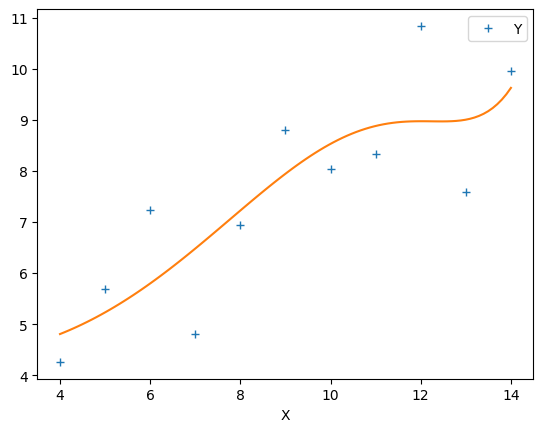

In [32]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
model = Pipeline([('poly', PolynomialFeatures(degree=11)),
                  ('linear', ElasticNet())])
model.fit(X, data.Y)
data.plot(style='+')
plt.plot(xx, model.predict(xx))
plt.show()


In [33]:
model['linear'].coef_

array([ 0.00000000e+00,  0.00000000e+00,  4.00484580e-03,  7.96270195e-03,
       -1.44903923e-04, -1.42431772e-05, -9.13327699e-07, -4.73022216e-08,
       -1.59430388e-09,  2.77004902e-11,  1.19630669e-11,  1.50983788e-12])

In [34]:
score = pd.DataFrame(columns=['mean', 'std'])
for n in range(10):
  model = Pipeline([('poly', PolynomialFeatures(degree=n)),
                    ('linear', ElasticNet(fit_intercept=False, tol=1e-4, random_state=13))])
  sc = cross_val_score(model, X, data.Y, cv=cv, scoring='neg_mean_squared_error')
  score.loc[n] = [-sc.mean(), sc.std()]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.544e+00, tolerance: 5.593e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.154e-01, tolerance: 5.795e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.278e+00, tolerance: 5.126e

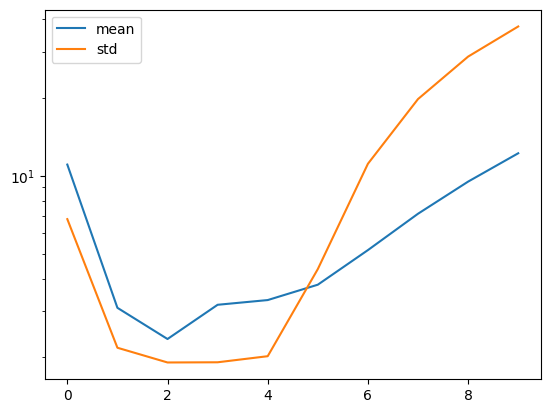

In [35]:
score.plot(logy=True)
plt.show()

2.3440707642356298

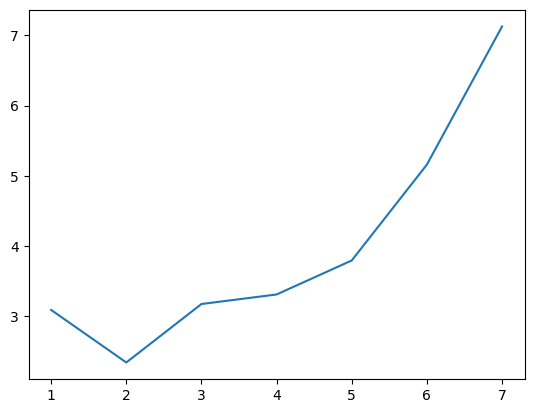

In [36]:
score[1:8]['mean'].plot()
score['mean'].min()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.093e+01, tolerance: 6.601e-02
  model = cd_fast.enet_coordinate_descent(


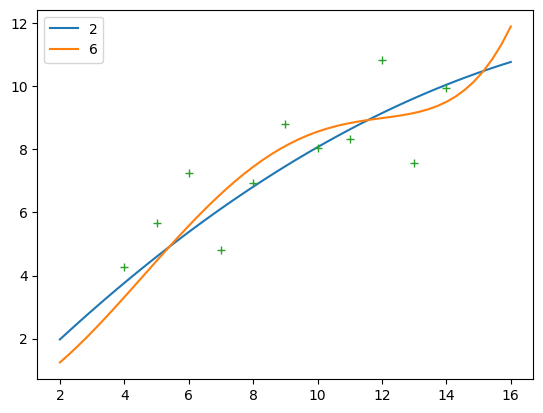

In [37]:
x_ = np.linspace(2, 16).reshape(-1, 1)

pd.DataFrame(
  {n: Pipeline([('poly', PolynomialFeatures(degree=n)),
                 ('linear', ElasticNet(fit_intercept=False))]).fit(X, data.Y).predict(x_)
                 for n in (2, 6)},
  index = x_[:,0]
).plot()
plt.plot(X, data.Y, '+')
plt.show()

## Логистическая

Вместо вещественных чисел будем предсказывать числа из [0, 1]

Получается что мы решаем другую задачу и пришли к теме следующего семинара (классификация).


<img src='https://miro.medium.com/max/640/0*gKOV65tvGfY8SMem.png' width=600/>

$\displaystyle\sigma(x) = \frac{1}{1 + e^{-x}}$

Задача теперь формулируется так:

**Предсказания:** $$
y_{pred}(x, w) = \frac{1}{1 + e^{-\langle x, w \rangle}}
$$

**Функция потерь (LogLoss):** $$
L(y_{pred}, y) = -y\, log\,y_{pred} - (1-y)\,log\,(1-y_{pred})
$$

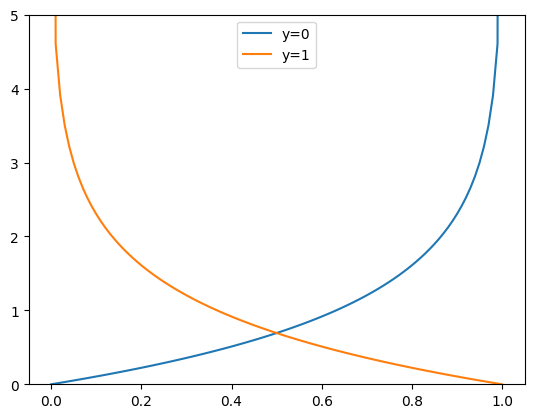

In [38]:
from sklearn.metrics import log_loss

yhat = [x*0.01 for x in range(0, 101)]
losses_0 = [log_loss([0], [x], labels=[0,1]) for x in yhat]
losses_1 = [log_loss([1], [x], labels=[0,1]) for x in yhat]
plt.plot(yhat, losses_0, label='y=0')
plt.plot(yhat, losses_1, label='y=1')
plt.ylim((0, 5))
plt.legend()
plt.show()

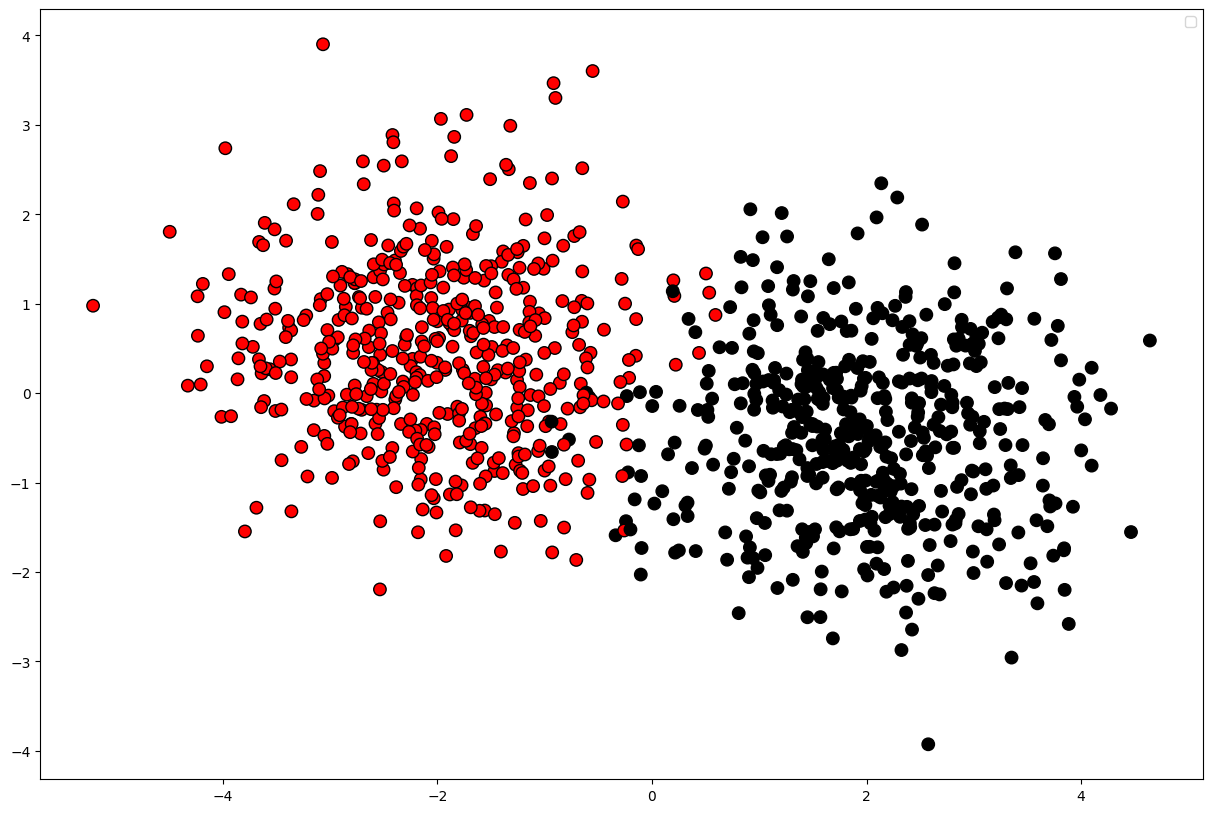

In [40]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=[[-2,0.5],[2,-0.5]], cluster_std=1, random_state=13)

colors = ("red", "k")
colored_y = np.zeros(y.size, dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[y == cl] = str(colors[i])

plt.figure(figsize=(15,10))
plt.scatter(X[:, 0], X[:, 1], c=colored_y, edgecolors='k', s=80)
plt.legend()
plt.show()

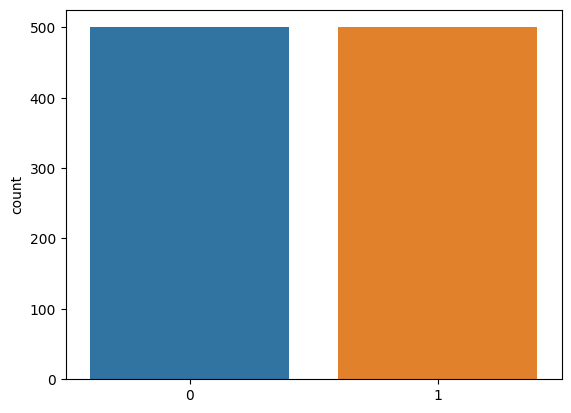

In [41]:
import seaborn as sns

sns.countplot(x=y)
plt.show()

In [42]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)
clf.fit(X, y)

LogisticRegression(random_state=0)

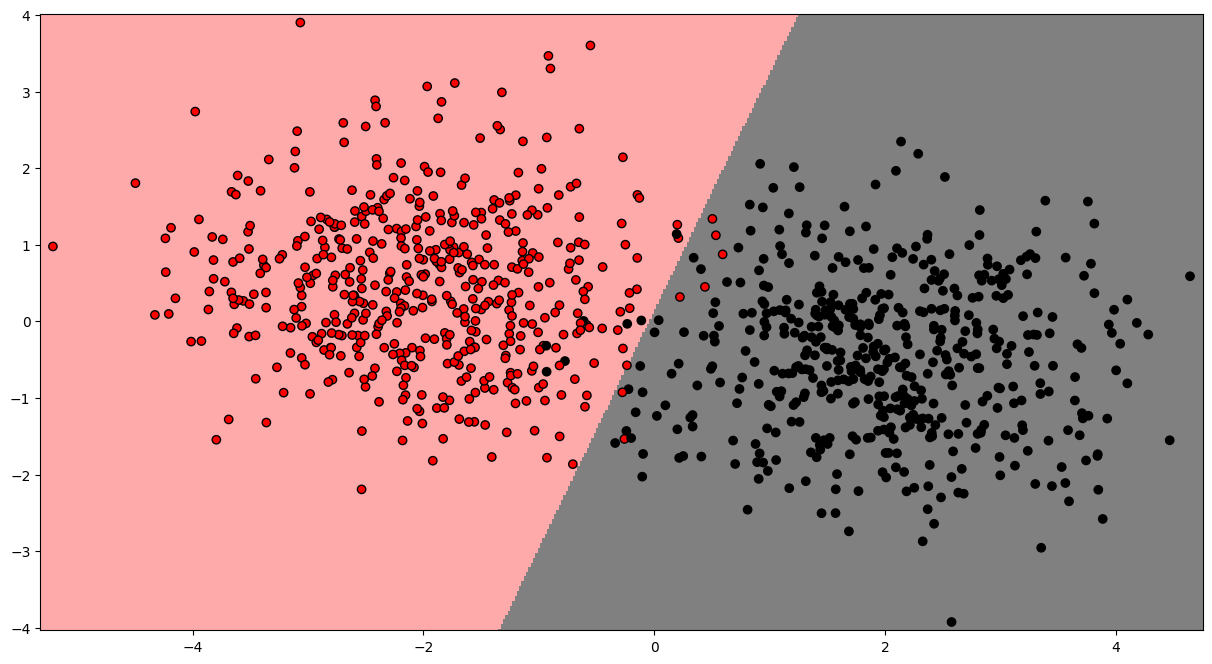

In [44]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

plt.figure(figsize=(15,8))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X[:,0]) - eps, np.max(X[:,0]) + eps, 500),
                     np.linspace(np.min(X[:,1]) - eps, np.max(X[:,1]) + eps, 500))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', 'grey'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=colored_y, edgecolors='k')
plt.show()

# Задание

1. Попытаться применить линейную регрессию к какой-либо паре зависимой и независимой переменных в собственном наборе данных. Нарисовать график зависимости y от x с линией. Кроссвалидацией оценить ошибку (любая метрика ошибки на ваш выбор).
2. Теперь при той же зависимой переменной y взять в качестве независимых переменных все (числовые) переменные набора данных. График нарисовать уже не получится, но кроссвалидацией всё равно можно оценить ошибку с той же выборкой. Стала ли ошибка меньше за счет того, что у модели больше информации?





1

In [ ]:
df = pd.read_csv('/content/sample_data/NBA_2020.csv')
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,0.592,...,0.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,0.557,...,0.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,0.493,...,0.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,0.500,...,NaN,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
4,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,0.368,...,0.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,Trae Young,PG,21,ATL,60,60,35.3,9.1,20.8,0.437,...,0.860,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6
647,Cody Zeller,C,27,CHO,58,39,23.1,4.3,8.3,0.524,...,0.682,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1
648,Tyler Zeller,C,30,SAS,2,0,2.0,0.5,2.0,0.250,...,NaN,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0
649,Ante ?i?i?,C,23,CLE,22,0,10.0,1.9,3.3,0.569,...,0.737,0.8,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4


In [ ]:
df= df.applymap(lambda x: x if pd.notnull(x) else 0)
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,0.592,...,0.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,0.557,...,0.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,0.493,...,0.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,0.500,...,0.000,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
4,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,0.368,...,0.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,Trae Young,PG,21,ATL,60,60,35.3,9.1,20.8,0.437,...,0.860,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6
647,Cody Zeller,C,27,CHO,58,39,23.1,4.3,8.3,0.524,...,0.682,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1
648,Tyler Zeller,C,30,SAS,2,0,2.0,0.5,2.0,0.250,...,0.000,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0
649,Ante ?i?i?,C,23,CLE,22,0,10.0,1.9,3.3,0.569,...,0.737,0.8,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4


In [ ]:
df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

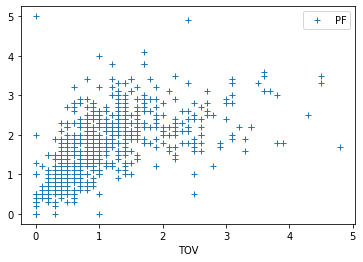

In [ ]:
df.plot(x='TOV', y='PF', style='+')
plt.show()

In [ ]:
model = LinearRegression()
model.fit(np.array(df[['TOV']]).reshape(-1, 1), np.array(df['PF']))
linear.coef_[0]

0.5002727272727274

In [ ]:
model.intercept_

1.1089638532115542

In [ ]:
a = model.coef_[0]
b = model.intercept_
predict = model.predict(np.array(df[['TOV']]).reshape(-1, 1))

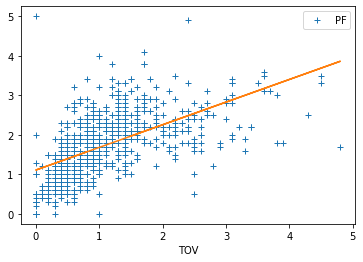

In [ ]:
df.plot(x='TOV', y='PF', style='+')
plt.plot(np.array(df[['TOV']]), predict)
plt.show()

In [ ]:
score = pd.DataFrame(columns=['mean', 'std'])
sc = cross_val_score(model, df[['TOV']], df['PF'], cv=cv, scoring='neg_mean_squared_error')
score.loc[0] = [-sc.mean(), sc.std()]
score

,mean,std
0,0.640087,0.645913


2

In [ ]:
model.fit(df[['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', 'FT%', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'PF', 'PTS']], df['TOV'])
print(model.coef_, model.intercept_)

[-4.54664717e-03 -1.20690064e-03 -7.40633047e-06 -1.90704439e-02
 -4.55261624e-01 -5.38267114e-02  1.76422411e+00 -5.27178627e-01
  3.61110785e-02  2.02710153e-01  9.67354226e-02 -1.18446757e-01
  1.13703198e-01 -3.91322821e-01 -1.20279813e+00 -4.47852541e-01
  2.22542735e-01  3.37532755e-01  3.27496064e-01 -2.80269725e-01
  2.16791279e-01  1.32352935e-01 -6.66973168e-02  1.16901477e-01
  2.79103684e-01] 0.1240784256833598


In [ ]:
score = pd.DataFrame(columns=['mean', 'std'])
sc = cross_val_score(model, df[['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', 'FT%', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'PF', 'PTS']], df['TOV'], cv=cv, scoring='neg_mean_squared_error')
score.loc[0] = [-sc.mean(), sc.std()]
score

,mean,std
0,0.165062,0.485411


Ошибка линенйной регрессии стала меньше